# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** I Gusti Bagus Sutha Arianata Putra
- **Email:** ngurahagung909@gmail.com
- **ID Dicoding:** bagus_sutha

## Menentukan Pertanyaan Bisnis

- Apa saja 10 kategori produk dengan quantitas penjualan yang paling tinggi?
- Bagaimana perbandingan frekuensi metode pembayaran yang digunakan?
- Bagaimana tren penjualan setiap bulannya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Untuk menjawab pertanyaan bisnis, maka dataset yang digunakan adalah order_items_dataset.csv, products_dataset.csv dan order_payments_dataset.csv.

In [2]:
order_items = pd.read_csv("data/order_items_dataset.csv")
products = pd.read_csv("data/products_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")

Melihat isi masing-masing dataset

In [3]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Untuk memudahkan explorasi data, akan dilakukan merge atau penggabungan data dari order_items dan product dengan key "product_id"

In [6]:
merged_order = pd.merge(order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')
merged_order.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim


**Insight:**
- Terdapat 2 dataframe yang akan digunakan untuk exploratory dan untuk menjawab pertanyaan bisnis
- Dataframe merged_order berisikan semua pesanan yang ditambahkan kolom nama kategori produk sedangkan dataframe order_payments berisi metode pembayaran setiap pesanan

### Assessing Data

mengenal dataframe

In [7]:
order_items.info()
products.info()
order_payments.info()
merged_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         

# Memeriksa missing values

In [8]:
# Menghitung nilai null untuk setiap DataFrame
order_items_null = order_items.isnull().sum()
products_null = products.isnull().sum()
order_payments_null = order_payments.isnull().sum()
merged_order_null = merged_order.isnull().sum()

# Menampilkan hasilnya secara terpisah
print("Missing values in order_items:")
print(order_items_null)
print("\nMissing values in products:")
print(products_null)
print("\nMissing values in order_payments:")
print(order_payments_null)
print("\nMissing values in merged_order:")
print(merged_order_null)


Missing values in order_items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing values in products:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Missing values in order_payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Missing values in merged_order:
order_id                    0
order_item_id               0
product_id                  0
seller_id                   0
shipping_limit_date         0
price                       0
freight_value               0
product_cate

## Memeriksa nilai duplikat

In [9]:
order_items.duplicated().sum()
products.duplicated().sum()
order_payments.duplicated().sum()
merged_order.duplicated().sum()

0

**Insight:**
- Jumlah baris merged_order adalah 112650 dan jumlah baris order_payments adalah 103886
- Pada merged_order terdapat 1603 baris data yang tidak memiliki kategori sehingga dapat dibersihkan, sedangkan pada order_payments tidak terdapat null value.
- Pada keempat dataframe tidak terdapat nilai duplikat.

### Cleaning Data

Membersihkan data null pada merged_order

In [10]:
merged_order.dropna(axis=0, inplace=True)

merged_order.isnull().sum()

order_id                 0
order_item_id            0
product_id               0
seller_id                0
shipping_limit_date      0
price                    0
freight_value            0
product_category_name    0
dtype: int64

melihat jumlah value setelah data dibersihkan

In [11]:
merged_order.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: count, Length: 73, dtype: int64

In [12]:
order_payments.payment_type.value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Menghilangkan metode pembayaran "not_defined"

In [13]:
order_payments = order_payments[order_payments['payment_type'] != 'not_defined']
order_payments.payment_type.value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64

Mengubah kolom waktu merged_order menjadi tipe datetime

In [14]:
merged_order['shipping_limit_date'] = pd.to_datetime(merged_order['shipping_limit_date'])

**Insight:**
- order_merged sudah tidak memiliki data null lagi setelah dibersihkan
- Tidak ada lagi order dengan pembayaran 'not_defined'

## Exploratory Data Analysis (EDA)

### Explore ...

melihat parameter statistik

In [15]:
merged_order.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
count,111047,111047.000000,111047,111047,111047,111047.000000,111047.000000,111047
unique,97277,NaN,32341,3035,NaN,NaN,NaN,73
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,cama_mesa_banho
freq,21,NaN,527,2033,NaN,NaN,NaN,11115
mean,NaN,1.198213,NaN,NaN,2018-01-08 10:05:09.240672768,120.778665,20.025212,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-21 04:47:36.500000,39.900000,13.080000,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-28 23:18:29,74.990000,16.300000,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-11 00:23:03.500000,134.900000,21.180000,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN


In [16]:
order_payments.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103883,103883.000000,103883,103883.000000,103883.000000
unique,99437,NaN,4,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092681,NaN,2.853402,154.104831
std,NaN,0.706594,NaN,2.687071,217.495628
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.800000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.840000


Melihat urutan kategori yang terjual

In [17]:
merged_order.groupby(by="product_category_name").product_category_name.count().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: product_category_name, Length: 73, dtype: int64

Melihat urutan metode pembayaran

In [18]:
order_payments.groupby(by="payment_type").payment_type.count().sort_values(ascending=False)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

**Insight:**
- Dari tabel-tabel di atas dapat dilihat metode pembayaran terbanyak
- Dari tabel-tabel di atas dapat dilihat kategori produk terjual terbanyak

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Untuk mencari tahu top 10 kategori produk yang terjual, maka akan digunakan bar chart sebagai alat visualisasi

In [19]:
# Ekstrak data jumkah penjualan setiap product dari merged_order
category_bar_data = merged_order['product_category_name'].value_counts().reset_index()
category_bar_data.columns = ['product_category_name', 'count']

In [20]:
# Mengekstrak 10 kategori terbaik
top_10_category = category_bar_data.head(10)

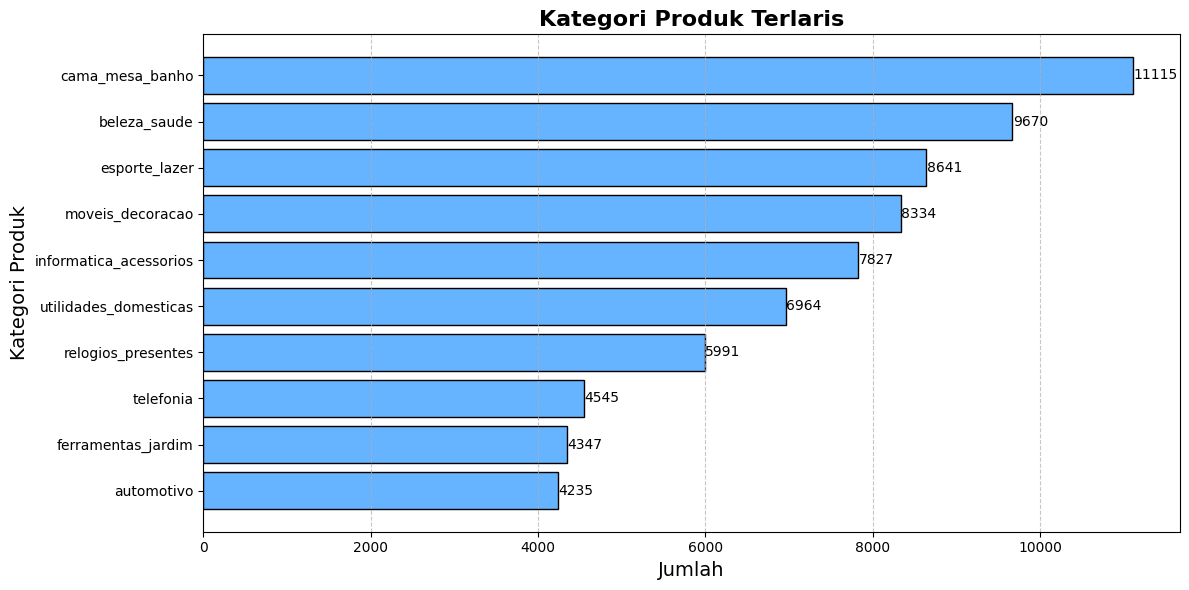

In [21]:
# Visualisasi
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_category['product_category_name'], top_10_category['count'], color='#66b3ff', edgecolor='black')

# Menambahkan judul dan label
plt.title("Kategori Produk Terlaris", fontsize=16, fontweight='bold')
plt.xlabel("Jumlah", fontsize=14)
plt.ylabel("Kategori Produk", fontsize=14)

# Menampilkan nilai pada setiap bar dengan gap lebih besar
for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2,  # Menambah offset menjadi 2
             f'{bar.get_width()}', va='center', fontsize=10)

# Membuat grid untuk meningkatkan keterbacaan
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Membalik urutan sumbu y
plt.gca().invert_yaxis()

# Menampilkan chart
plt.tight_layout()  # Menyempurnakan tata letak
plt.show()


### Pertanyaan 2:

Untuk mengetahui perbandingan frekuensi maka dapat digunakan pie chart sebagai alat visualisasi

In [22]:
# Ekstrak data method & count dari order_payments
payment_counts = order_payments['payment_type'].value_counts().reset_index()
payment_counts.columns = ['method', 'count']

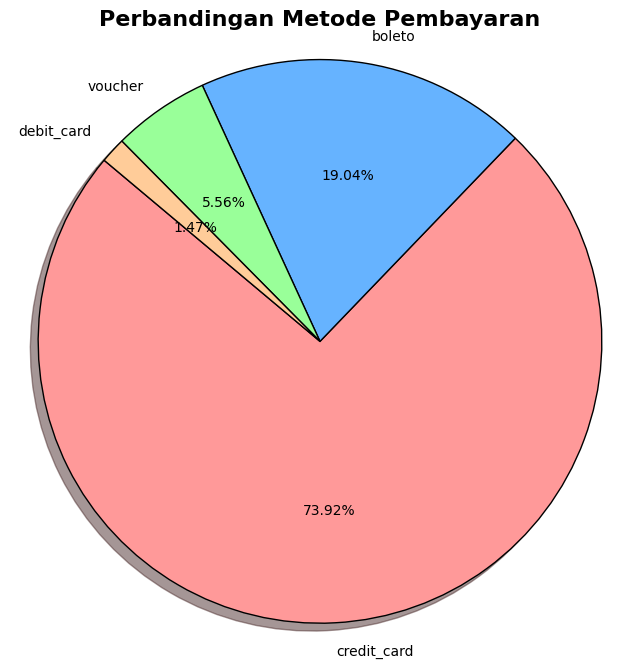

In [23]:
# Visualisasi

# Warna palet
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Membuat pie chart dengan tampilan lebih profesional
plt.figure(figsize=(8, 8))
plt.pie(payment_counts['count'], labels=payment_counts['method'], autopct='%1.2f%%', 
        colors=colors, shadow=True, startangle=140, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})

# Menambahkan judul
plt.title('Perbandingan Metode Pembayaran', fontsize=16, fontweight='bold')

# Menampilkan chart
plt.axis('equal')  # Memastikan chart berbentuk lingkaran sempurna
plt.show()


### Pertanyaan 3:

Untuk mengetahui tren penjualan maka dapat digunakan line chart sebagai alat visualisasi

In [24]:
# Ekstrak tahun dan bulan
merged_order['year_month'] = merged_order['shipping_limit_date'].dt.to_period('M')

In [25]:
# Menghitung total penjualan bulanan
monthly_sales = merged_order.groupby('year_month')['order_id'].count().reset_index()
monthly_sales.columns = ['year_month', 'total_sales']

In [26]:
# Membuat rentang bulan dari bulan pertama hingga bulan terakhir
all_months = pd.date_range(start=monthly_sales['year_month'].min().start_time, 
                            end=monthly_sales['year_month'].max().end_time, 
                            freq='M').to_period('M')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22584\1891659398.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_months = pd.date_range(start=monthly_sales['year_month'].min().start_time,


In [27]:
# Menggabungkan data penjualan dengan rentang semua bulan
monthly_sales_full = pd.DataFrame(all_months, columns=['year_month']).merge(monthly_sales, on='year_month', how='left')

# Mengisi nilai NaN dengan 0 untuk bulan yang tidak ada penjualan
monthly_sales_full['total_sales'] = monthly_sales_full['total_sales'].fillna(0)

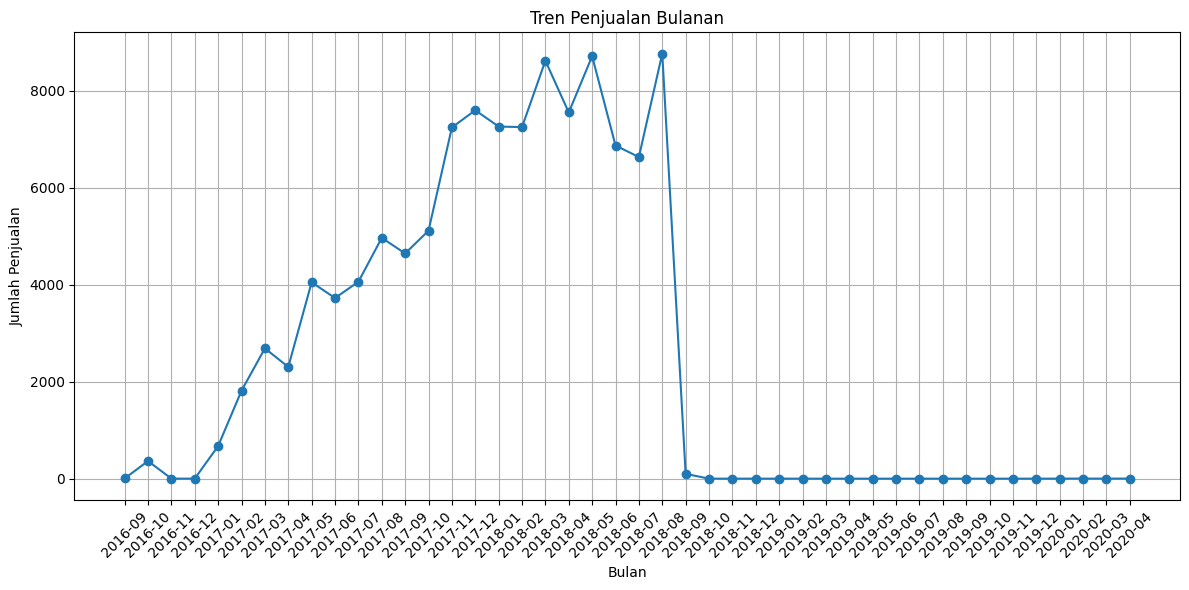

In [28]:
# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_full['year_month'].astype(str), monthly_sales_full['total_sales'], marker='o')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Mengatur layout
plt.show()

**Insight:**
- Dari pertanyaan 1, dapat dilihat pada bar chart 10 kategori dengan penjualan terbanyak dengan cama_mesa_banho menduduki peringkat 1
- Dari pertanyaan 2, dapat dilihat perbandingan penggunaaan metode pembayaran dimana credit_card merupakan metode yang paling banyak digunakan yakni 73.9%
- Dari pertanyaan 3, dapat dilihat bahwa terdapat pertumbuhan penjualan yang stabil dari september 2016 - mei 2018, tetapi mulai mengalami penurunan drastis mulai bulan juli 2018.

## Conclusion

- Pertanyaan bisnis no 1 dapat dijawab dengan hasil visualisasi yang ada pada tahap visualisasi dalam bentuk bar chart
- Pernyataan bisnis no 2 dapat dijawab dengan hasil visualisasi yang ada pada tahap visualisasi dalam bentuk pie chart
- Pernyataan bisnis no 3 dapat dijawab dengan hasil visualisasi yang ada pada tahap visualisasi dalam bentuk line chart